Number of heads (h): 5
Dimension per head (d_k_per_head): 12

Input Tensor shape: (6, 60)

--- Head 1 ---
Attention Weights:
 [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


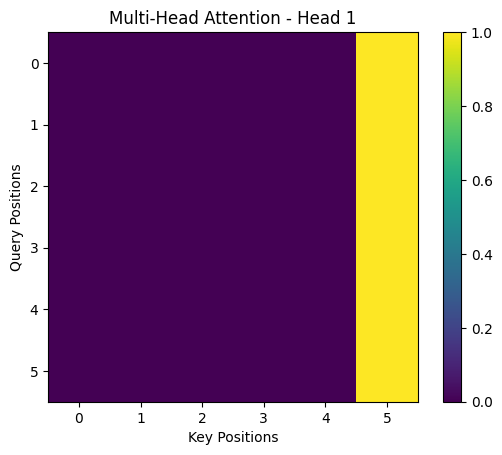


--- Head 2 ---
Attention Weights:
 [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


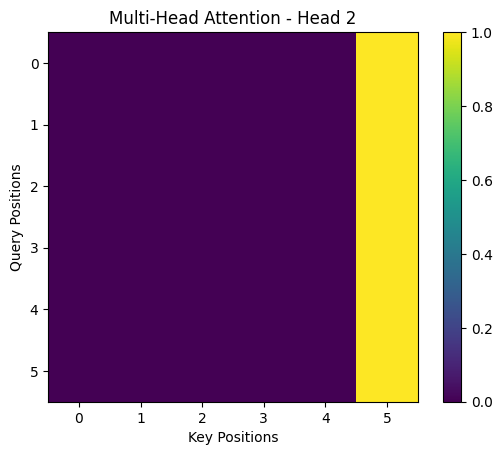


--- Head 3 ---
Attention Weights:
 [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


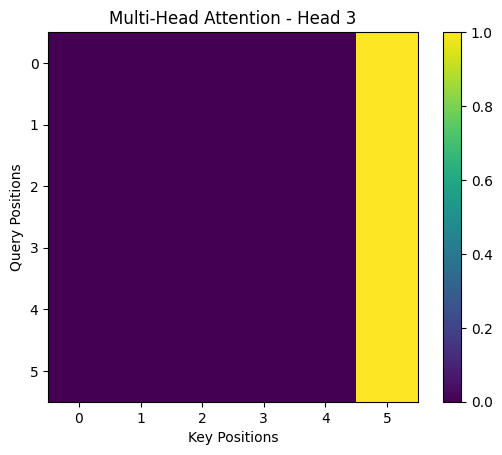


--- Head 4 ---
Attention Weights:
 [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


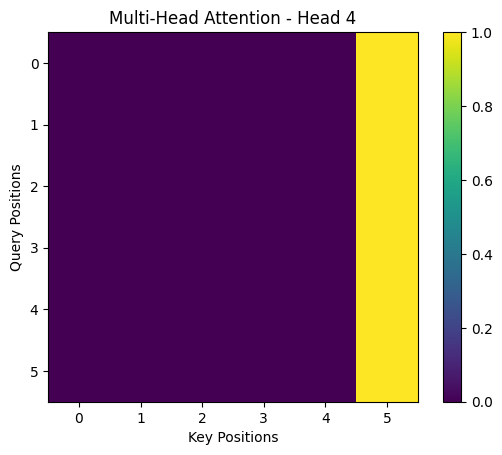


--- Head 5 ---
Attention Weights:
 [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


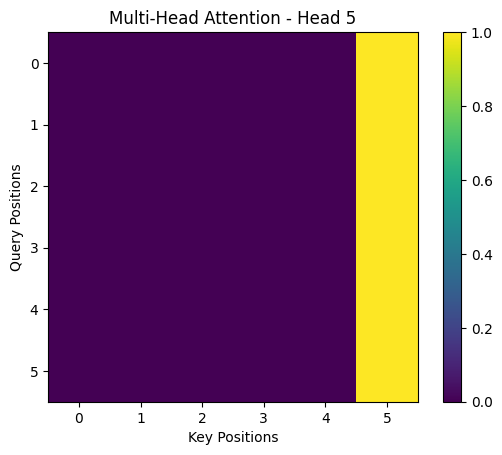


Concatenated Output shape: (6, 60)

Final Multi-Head Attention Output shape: (6, 60)
Final Multi-Head Attention Output:
 [[449.6  483.32 488.37 535.33 540.99 518.64 499.36 565.57 480.81 520.01
  492.92 527.62 589.17 489.   480.35 518.37 583.43 537.64 501.6  505.41
  515.72 462.35 484.45 472.66 499.76 442.88 568.69 511.33 540.92 457.4
  506.43 484.73 479.72 474.91 463.51 465.09 517.04 453.83 486.7  556.16
  464.11 524.27 511.79 483.28 527.84 462.38 471.5  585.08 519.4  489.21
  498.16 476.29 489.16 535.58 495.84 534.28 532.77 488.61 494.69 494.52]
 [449.6  483.32 488.37 535.33 540.99 518.64 499.36 565.57 480.81 520.01
  492.92 527.62 589.17 489.   480.35 518.37 583.43 537.64 501.6  505.41
  515.72 462.35 484.45 472.66 499.76 442.88 568.69 511.33 540.92 457.4
  506.43 484.73 479.72 474.91 463.51 465.09 517.04 453.83 486.7  556.16
  464.11 524.27 511.79 483.28 527.84 462.38 471.5  585.08 519.4  489.21
  498.16 476.29 489.16 535.58 495.84 534.28 532.77 488.61 494.69 494.52]
 [449.6  483.3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#Helper Functions
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)
def plot_attention_weights(weights, title):
    plt.figure()
    plt.imshow(weights)
    plt.colorbar()
    plt.title(title)
    plt.xlabel("Key Positions")
    plt.ylabel("Query Positions")
    plt.show()
# Define Parameters
d_model = 60      # Original input dimension (changed)
h = 5             # Number of attention heads (changed)
d_k_per_head = d_model // h
seq_len = 6       # Sequence length (changed)
print("Number of heads (h):", h)
print("Dimension per head (d_k_per_head):", d_k_per_head)
# Simulate Input
np.random.seed(25)
input_tensor = np.random.rand(seq_len, d_model)
print("\nInput Tensor shape:", input_tensor.shape)
#Create Weight Matrice
W_Q_list = [np.random.rand(d_model, d_k_per_head) for _ in range(h)]
W_K_list = [np.random.rand(d_model, d_k_per_head) for _ in range(h)]
W_V_list = [np.random.rand(d_model, d_k_per_head) for _ in range(h)]
head_outputs =  [ ]
attention_weights_all_heads = [ ]
#Multi-Head Attention
for i in range(h):
    print(f"\n--- Head {i+1} ---")
    # 1. Linear projections
    Q_head = np.matmul(input_tensor, W_Q_list[i])
    K_head = np.matmul(input_tensor, W_K_list[i])
    V_head = np.matmul(input_tensor, W_V_list[i])
    # 2. Attention scores
    attention_scores = np.matmul(Q_head, K_head.T)
    # 3. Scale
    attention_scores_scaled = attention_scores / np.sqrt(d_k_per_head)
    # 4. Softmax
    attention_weights = softmax(attention_scores_scaled)
    attention_weights_all_heads.append(attention_weights)
    print("Attention Weights:\n", np.round(attention_weights, 3))
    # 5. Weighted sum
    output_head = np.matmul(attention_weights, V_head)
    head_outputs.append(output_head)
    # Plot heatmap
    plot_attention_weights(attention_weights,
    title=f"Multi-Head Attention - Head {i+1}")
#Concatenate Heads
concatenated_output = np.concatenate(head_outputs, axis=-1)
print("\nConcatenated Output shape:", concatenated_output.shape)
# Final Linear Projectioj
W_O = np.random.rand(h * d_k_per_head, d_model)
multi_head_output = np.matmul(concatenated_output, W_O)
print("\nFinal Multi-Head Attention Output shape:", multi_head_output.shape)
print("Final Multi-Head Attention Output:\n", np.round(multi_head_output, 2))